In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.layers import Dropout

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import

In [5]:
df = pd.read_csv("Data/clean_data.csv", index_col=  "Index")

In [6]:
df.head(1)

,Price,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Doors_number,Colour,Features
Index,,,,,,,,,,,,,,
116465,42900,Used,Opel,Astra,2015,125000.0,136.0,1598.0,Diesel,Front wheels,Manual,5.0,red,48.0


# Just Volks...

In [14]:
volkswagen = df[df["Vehicle_brand"] == "Volkswagen"]

In [15]:
volkswagen = volkswagen[volkswagen["Price"] < 100000]

In [16]:
volkswagen_dum = pd.get_dummies(volkswagen,drop_first=True)

In [17]:
X = volkswagen_dum.drop("Price",axis = 1)

In [18]:
y = volkswagen_dum["Price"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)

In [32]:
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)

In [22]:
X_test = scaler.transform(X_test)

In [23]:
model = Sequential()

model.add(Dense(150,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(25,activation='relu'))

#model.add(Dense(6,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mae')

In [78]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=25)

Epoch 1/25
94/94 [==============================] - 1s 4ms/step - loss: 24128.4746 - val_loss: 10550.7812
Epoch 2/25
94/94 [==============================] - 0s 3ms/step - loss: 8244.2510 - val_loss: 6671.5664
Epoch 3/25
94/94 [==============================] - 0s 3ms/step - loss: 5965.9004 - val_loss: 5581.3506
Epoch 4/25
94/94 [==============================] - 0s 3ms/step - loss: 5318.2500 - val_loss: 5096.6123
Epoch 5/25
94/94 [==============================] - 0s 3ms/step - loss: 4969.7339 - val_loss: 4826.6543
Epoch 6/25
94/94 [==============================] - 0s 3ms/step - loss: 4813.7954 - val_loss: 4736.4224
Epoch 7/25
94/94 [==============================] - 0s 3ms/step - loss: 4644.3311 - val_loss: 4673.8496
Epoch 8/25
94/94 [==============================] - 0s 3ms/step - loss: 4527.5044 - val_loss: 4736.8066
Epoch 9/25
94/94 [==============================] - 0s 3ms/step - loss: 4470.7803 - val_loss: 4538.8892
Epoch 10/25
94/94 [==============================] - 0s 3ms/st

# Separating brands turned out to be pointless

# Get dummies

In [24]:
df_dum = pd.get_dummies(df,drop_first=True)

# Split and Scale Data

In [25]:
X = df_dum.drop(["Price"], axis = 1)

In [26]:
y = df_dum["Price"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=110)

In [28]:
scaler = StandardScaler()

In [29]:
X_train = scaler.fit_transform(X_train)

In [30]:
X_test = scaler.transform(X_test)

# DeepLearning

# All price Cars

In [31]:
X.head(1)

,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number,Features,Condition_Used,Vehicle_brand_Alfa Romeo,Vehicle_brand_Audi,Vehicle_brand_BMW,...,Colour_burgundy,Colour_golden,Colour_gray,Colour_green,Colour_other,Colour_red,Colour_silver,Colour_violet,Colour_white,Colour_yellow
Index,,,,,,,,,,,,,,,,,,,,,
116465,2015,125000.0,136.0,1598.0,5.0,48.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [32]:
model = Sequential()

model.add(Dense(150,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(25,activation='relu'))

#model.add(Dense(6,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mae')

In [24]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=256,epochs=100)

Epoch 1/100
486/486 [==============================] - 3s 5ms/step - loss: 15085.5166 - val_loss: 7705.6343
Epoch 2/100
486/486 [==============================] - 3s 5ms/step - loss: 6959.0269 - val_loss: 6740.0029
Epoch 3/100
486/486 [==============================] - 2s 5ms/step - loss: 6453.9829 - val_loss: 6439.5967
Epoch 4/100
486/486 [==============================] - 2s 5ms/step - loss: 6264.6499 - val_loss: 6262.2759
Epoch 5/100
486/486 [==============================] - 2s 5ms/step - loss: 6154.4175 - val_loss: 6273.1870
Epoch 6/100
486/486 [==============================] - 2s 4ms/step - loss: 6015.1123 - val_loss: 6186.3789
Epoch 7/100
486/486 [==============================] - 2s 4ms/step - loss: 5988.2598 - val_loss: 6109.7373
Epoch 8/100
486/486 [==============================] - 2s 4ms/step - loss: 5908.3623 - val_loss: 6053.9043
Epoch 9/100
486/486 [==============================] - 2s 4ms/step - loss: 5839.7041 - val_loss: 6103.9512
Epoch 10/100
486/486 [==============

Epoch 77/100
486/486 [==============================] - 2s 4ms/step - loss: 4827.3535 - val_loss: 5631.0859
Epoch 78/100
486/486 [==============================] - 2s 5ms/step - loss: 4861.3262 - val_loss: 5587.5317
Epoch 79/100
486/486 [==============================] - 2s 4ms/step - loss: 4841.1011 - val_loss: 5715.0122
Epoch 80/100
486/486 [==============================] - 2s 4ms/step - loss: 4816.0503 - val_loss: 6217.2026
Epoch 81/100
486/486 [==============================] - 2s 4ms/step - loss: 4815.2852 - val_loss: 5634.1045
Epoch 82/100
486/486 [==============================] - 2s 4ms/step - loss: 4808.7310 - val_loss: 5799.4756
Epoch 83/100
486/486 [==============================] - 2s 4ms/step - loss: 4794.7104 - val_loss: 5588.9277
Epoch 84/100
486/486 [==============================] - 2s 4ms/step - loss: 4797.1489 - val_loss: 5597.9727
Epoch 85/100
486/486 [==============================] - 2s 5ms/step - loss: 4781.5142 - val_loss: 5632.5664
Epoch 86/100
486/486 [======

In [25]:
5657.5508 / y_test.mean()

0.1182973274432766

In [ ]:
# 10k,25k,50k,100k,200k,500k,1000k

# Function to testing models

In [35]:
def test(X_train,y_train,X_test,y_test):
    n_layers = round(len(X_train[0])/120)
    neurons = round(len(X_train[0])/6)
    score = []
    
    for j in range(1,5):
        model = Sequential()
        for i in range(0,n_layers*j):
            model.add(Dense(neurons*j,activation='relu'))
        model.add(Dense(1))
        model.compile(optimizer='adam',loss='mae')
        model.fit(x=X_train,y=y_train.values,
              validation_data=(X_test,y_test.values),
              batch_size=128,epochs=5)
        preds = model.predict(X_test)
        
        score.append("Number of Layers : " + str(n_layers*j))
        score.append("Number of neurons by Layer : " + str(neurons*j))
        score.append(mean_absolute_error(y_test,preds)) 
    print(score)
    return score
    

In [36]:
score = test(X_train,y_train,X_test,y_test)

Epoch 1/5
972/972 [==============================] - 2s 2ms/step - loss: 20899.5879 - val_loss: 10167.4336
Epoch 2/5
972/972 [==============================] - 2s 2ms/step - loss: 8656.4492 - val_loss: 7789.6904
Epoch 3/5
972/972 [==============================] - 2s 2ms/step - loss: 7298.5562 - val_loss: 7139.5269
Epoch 4/5
972/972 [==============================] - 2s 2ms/step - loss: 6827.2612 - val_loss: 6807.1885
Epoch 5/5
1667/1667 [==============================] - 2s 960us/step
Epoch 1/5
972/972 [==============================] - 4s 4ms/step - loss: 11594.3633 - val_loss: 7197.0825
Epoch 2/5
972/972 [==============================] - 3s 3ms/step - loss: 6712.7646 - val_loss: 6800.8896
Epoch 3/5
972/972 [==============================] - 3s 3ms/step - loss: 6407.5479 - val_loss: 6611.7358
Epoch 4/5
972/972 [==============================] - 3s 3ms/step - loss: 6276.7988 - val_loss: 6379.4102
Epoch 5/5
1667/1667 [==============================] - 2s 1ms/step
Epoch 1/5
972/972 [==

In [291]:
score

['Number of Layers : 3',
 'Number of neurons by Layer : 60',
 4745.423315321655,
 'Number of Layers : 6',
 'Number of neurons by Layer : 120',
 4658.609052938467,
 'Number of Layers : 9',
 'Number of neurons by Layer : 180',
 4726.407577611303,
 'Number of Layers : 12',
 'Number of neurons by Layer : 240',
 5646.325984682246]

In [292]:
# 6 leyers with 120 neurons

# Flexible model1

In [37]:
model = Sequential()

model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
#model.add(Dense(6,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mae')

In [38]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=100)

Epoch 1/100
972/972 [==============================] - 4s 4ms/step - loss: 11835.5488 - val_loss: 7253.6240
Epoch 2/100
972/972 [==============================] - 3s 3ms/step - loss: 6763.7114 - val_loss: 6564.7935
Epoch 3/100
972/972 [==============================] - 3s 3ms/step - loss: 6463.5137 - val_loss: 6426.8101
Epoch 4/100
972/972 [==============================] - 3s 3ms/step - loss: 6278.0190 - val_loss: 6360.0757
Epoch 5/100
972/972 [==============================] - 3s 3ms/step - loss: 6154.7148 - val_loss: 6176.1909
Epoch 6/100
972/972 [==============================] - 3s 3ms/step - loss: 6078.6509 - val_loss: 6187.8003
Epoch 7/100
972/972 [==============================] - 3s 3ms/step - loss: 6039.6436 - val_loss: 6125.9917
Epoch 8/100
972/972 [==============================] - 3s 3ms/step - loss: 5930.6763 - val_loss: 6054.4458
Epoch 9/100
972/972 [==============================] - 3s 4ms/step - loss: 5894.3931 - val_loss: 6006.3960
Epoch 10/100
972/972 [==============

Epoch 77/100
972/972 [==============================] - 3s 3ms/step - loss: 4848.5469 - val_loss: 5584.8350
Epoch 78/100
972/972 [==============================] - 3s 3ms/step - loss: 4824.4253 - val_loss: 5603.6016
Epoch 79/100
972/972 [==============================] - 3s 3ms/step - loss: 4836.0527 - val_loss: 5616.0972
Epoch 80/100
972/972 [==============================] - 3s 3ms/step - loss: 4826.5605 - val_loss: 5630.3584
Epoch 81/100
972/972 [==============================] - 3s 3ms/step - loss: 4815.0967 - val_loss: 5641.3716
Epoch 82/100
972/972 [==============================] - 3s 3ms/step - loss: 4797.0112 - val_loss: 5625.4058
Epoch 83/100
972/972 [==============================] - 3s 3ms/step - loss: 4797.3911 - val_loss: 5537.8281
Epoch 84/100
972/972 [==============================] - 3s 3ms/step - loss: 4797.8184 - val_loss: 5547.6909
Epoch 85/100
972/972 [==============================] - 3s 3ms/step - loss: 4773.6069 - val_loss: 5713.8877
Epoch 86/100
972/972 [======

In [301]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

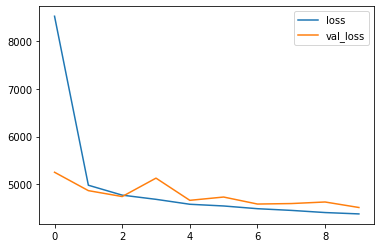

In [302]:
losses.plot()

In [18]:
preds = model.predict(X_test)

1667/1667 [==============================] - 2s 1ms/step


In [19]:
mean_absolute_error(y_test,preds) 

6076.456504081159

In [20]:
preds_df = pd.DataFrame(preds)

In [21]:
y_df = pd.DataFrame(y_test.values)

In [22]:
preds_df

,0
0,31369.828125
1,72350.062500
2,17001.167969
3,50897.496094
4,133630.000000
...,...
53315,25025.771484
53316,29652.050781
53317,23476.349609
53318,106400.578125


In [23]:
y_df

,0
0,29900
1,65500
2,14800
3,48000
4,121494
...,...
53315,26900
53316,27900
53317,20600
53318,89990


In [24]:
pd.concat([preds_df,y_df],axis = 1, ignore_index=True,join = "outer")

,0,1
0,31369.828125,29900
1,72350.062500,65500
2,17001.167969,14800
3,50897.496094,48000
4,133630.000000,121494
...,...,...
53315,25025.771484,26900
53316,29652.050781,27900
53317,23476.349609,20600
53318,106400.578125,89990


# Cars 100k max

In [22]:
df = pd.read_csv("Data/clean_data.csv", index_col=  "Index")

In [23]:
df

,Price,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Doors_number,Colour,Features
Index,,,,,,,,,,,,,,
116465,42900,Used,Opel,Astra,2015,125000.0,136.0,1598.0,Diesel,Front wheels,Manual,5.0,red,48.0
116466,11900,Used,Opel,Astra,2006,192547.0,140.0,1796.0,Gasoline,Front wheels,Manual,5.0,green,35.0
116467,25900,Used,Opel,Astra,2010,119000.0,115.0,1598.0,Gasoline,Front wheels,Manual,5.0,black,32.0
116468,8400,Used,Opel,Astra,2007,290000.0,100.0,1910.0,Diesel,Front wheels,Manual,5.0,silver,25.0
116469,15999,Used,Opel,Astra,2008,168779.0,115.0,1598.0,Gasoline,Front wheels,Manual,5.0,silver,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36977,9800,Used,Chevrolet,Spark,2010,200000.0,68.0,995.0,Gasoline,Front wheels,Manual,5.0,silver,21.0
36981,13800,Used,Chevrolet,Spark,2012,112644.0,68.0,1000.0,Gasoline,Front wheels,Manual,5.0,black,19.0
36984,11500,Used,Chevrolet,Spark,2011,126000.0,68.0,995.0,Gasoline,Front wheels,Manual,5.0,black,7.0


In [24]:
df_100k = df[df["Price"] < 100000]

In [25]:
df_dum = pd.get_dummies(df_100k,drop_first=True)

In [26]:
X = df_dum.drop(["Price"], axis = 1)

In [27]:
y = df_dum["Price"]

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=110)

In [30]:
X_train = scaler.fit_transform(X_train)

NameError: name 'scaler' is not defined

In [31]:
X_test = scaler.transform(X_test)

NameError: name 'scaler' is not defined

# Flexible model 100k

In [20]:
from tensorflow.keras.optimizers import SGD

In [8]:
model = Sequential()
model.add(Dense(150,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(25,activation='relu'))
#model.add(Dense(6,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mae')

In [9]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=256,epochs=10)

NameError: name 'X_train' is not defined

In [42]:

#4264.7524

In [46]:
tf.keras.models.save_model(model, "Models/model_100k_flexible.hdf5")

In [44]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

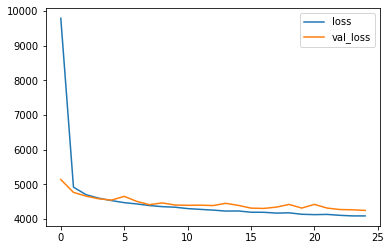

In [45]:
losses.plot()

In [46]:
preds = model.predict(X_test)

492/492 [==============================] - 1s 1ms/step


In [47]:
mean_absolute_error(y_test,preds) / y_test.mean()

0.11883883744965741

In [48]:
y_df = pd.DataFrame(y_test.values)
y_df

,0
0,7700
1,15900
2,22900
3,23500
4,74400
...,...
15730,19800
15731,36900
15732,30900
15733,13900


In [49]:
preds_df = pd.DataFrame(preds.round())
preds_df

,0
0,8061.0
1,15903.0
2,23278.0
3,19695.0
4,78157.0
...,...
15730,19211.0
15731,36258.0
15732,33393.0
15733,15611.0


In [50]:
df.drop("Price",axis = 1)

,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Doors_number,Colour,Features
Index,,,,,,,,,,,,,
116465,Used,Opel,Astra,2015,125000.0,136.0,1598.0,Diesel,Front wheels,Manual,5.0,red,48.0
116466,Used,Opel,Astra,2006,192547.0,140.0,1796.0,Gasoline,Front wheels,Manual,5.0,green,35.0
116467,Used,Opel,Astra,2010,119000.0,115.0,1598.0,Gasoline,Front wheels,Manual,5.0,black,32.0
116468,Used,Opel,Astra,2007,290000.0,100.0,1910.0,Diesel,Front wheels,Manual,5.0,silver,25.0
116469,Used,Opel,Astra,2008,168779.0,115.0,1598.0,Gasoline,Front wheels,Manual,5.0,silver,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36977,Used,Chevrolet,Spark,2010,200000.0,68.0,995.0,Gasoline,Front wheels,Manual,5.0,silver,21.0
36981,Used,Chevrolet,Spark,2012,112644.0,68.0,1000.0,Gasoline,Front wheels,Manual,5.0,black,19.0
36984,Used,Chevrolet,Spark,2011,126000.0,68.0,995.0,Gasoline,Front wheels,Manual,5.0,black,7.0


In [51]:
result_df = pd.concat([y_df,preds_df],axis = 1)

In [52]:
result_df.columns = ["Real Price", "Predicted Price"]

In [63]:
result_df["Difference"] = result_df["Real Price"] - result_df["Predicted Price"]
result_df["ABS Difference"] = abs(result_df["Real Price"] - result_df["Predicted Price"])

In [64]:
result_df["% of error"] = abs((result_df["Difference"]/result_df["Real Price"]) * 100).round(2)

In [65]:
result_df.head(10)

,Real Price,Predicted Price,Difference,% of error,ABS Difference
0,7700,8061.0,-361.0,4.69,361.0
1,15900,15903.0,-3.0,0.02,3.0
2,22900,23278.0,-378.0,1.65,378.0
3,23500,19695.0,3805.0,16.19,3805.0
4,74400,78157.0,-3757.0,5.05,3757.0
5,33000,28544.0,4456.0,13.50,4456.0
6,24900,29968.0,-5068.0,20.35,5068.0
7,6900,4842.0,2058.0,29.83,2058.0
8,17200,24578.0,-7378.0,42.90,7378.0
9,7900,10108.0,-2208.0,27.95,2208.0


# 0k - 10K

In [33]:
result_df[(result_df["Real Price"] < 10000)]["ABS Difference"].mean() / result_df[(result_df["Real Price"] < 10000)]["Real Price"].mean()

NameError: name 'result_df' is not defined

# 10k - 25k

In [34]:
result_df[(result_df["Real Price"] > 10000  ) & (result_df["Real Price"] < 25000)]["ABS Difference"].mean() / result_df[(result_df["Real Price"] > 10000  ) & (result_df["Real Price"] < 25000)]["Real Price"].mean()

NameError: name 'result_df' is not defined

# 25k - 50k

In [76]:
result_df[(result_df["Real Price"] > 25000  ) & (result_df["Real Price"] < 50000)]["ABS Difference"].mean() / result_df[(result_df["Real Price"] > 25000  ) & (result_df["Real Price"] < 50000)]["Real Price"].mean()

0.12322294480170609

# 50k - 100k

In [77]:
result_df[(result_df["Real Price"] > 50000  ) & (result_df["Real Price"] < 100000)]["ABS Difference"].mean() / result_df[(result_df["Real Price"] > 50000  ) & (result_df["Real Price"] < 100000)]["Real Price"].mean()

0.0937784516804489

# I decided to train the models for these price ranges separately

In [35]:
import os
cwd = os.getcwd()

print("Current working directory: {0}".format(cwd))

Current working directory: C:\Users\kacpe\Desktop\programowanie\Programowanie_w_Python\Car_Value_Project


In [36]:
score = []

In [37]:
def model_treining(df):
    df_dummies = pd.get_dummies(df,drop_first=True)
    X = df_dummies.drop("Price", axis = 1)
    y = df_dummies["Price"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model = Sequential()
    model.add(Dense(100,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(25,activation='relu'))
    model.add(Dense(25,activation='relu'))
    #model.add(Dense(6,activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam',loss='mae')
    model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=256,epochs=100)
    preds = model.predict(X_test)
    print(mean_absolute_error(y_test,preds) / y_test.mean())
    score.append(mean_absolute_error(y_test,preds) / y_test.mean())
    plt.clf()
    plt.scatter(y_test,preds)
    
    plt.plot(y_test,y_test,'r')
    
    #tf.keras.models.save_model(model,  name + ".hdf5")
    return model
    

In [38]:
df_10k = df[df["Price"] < 10000]

Epoch 1/100
61/61 [==============================] - 1s 7ms/step - loss: 5528.4619 - val_loss: 2172.8264
Epoch 2/100
61/61 [==============================] - 0s 4ms/step - loss: 1724.6304 - val_loss: 1509.9822
Epoch 3/100
61/61 [==============================] - 0s 4ms/step - loss: 1484.1134 - val_loss: 1449.5424
Epoch 4/100
61/61 [==============================] - 0s 4ms/step - loss: 1412.2897 - val_loss: 1382.2949
Epoch 5/100
61/61 [==============================] - 0s 4ms/step - loss: 1366.9010 - val_loss: 1366.4147
Epoch 6/100
61/61 [==============================] - 0s 3ms/step - loss: 1359.4330 - val_loss: 1348.7676
Epoch 7/100
61/61 [==============================] - 0s 4ms/step - loss: 1326.0475 - val_loss: 1372.9399
Epoch 8/100
61/61 [==============================] - 0s 3ms/step - loss: 1320.6647 - val_loss: 1328.6183
Epoch 9/100
61/61 [==============================] - 0s 4ms/step - loss: 1302.6350 - val_loss: 1325.6448
Epoch 10/100
61/61 [==============================] - 0

61/61 [==============================] - 0s 3ms/step - loss: 1118.9104 - val_loss: 1275.3248
Epoch 79/100
61/61 [==============================] - 0s 3ms/step - loss: 1114.8816 - val_loss: 1263.6927
Epoch 80/100
61/61 [==============================] - 0s 3ms/step - loss: 1114.2971 - val_loss: 1292.1862
Epoch 81/100
61/61 [==============================] - 0s 3ms/step - loss: 1120.8475 - val_loss: 1268.7810
Epoch 82/100
61/61 [==============================] - 0s 3ms/step - loss: 1106.5400 - val_loss: 1267.3865
Epoch 83/100
61/61 [==============================] - 0s 3ms/step - loss: 1109.1165 - val_loss: 1278.8237
Epoch 84/100
61/61 [==============================] - 0s 3ms/step - loss: 1100.8341 - val_loss: 1265.1536
Epoch 85/100
61/61 [==============================] - 0s 3ms/step - loss: 1105.3809 - val_loss: 1293.4021
Epoch 86/100
61/61 [==============================] - 0s 3ms/step - loss: 1102.4062 - val_loss: 1267.6567
Epoch 87/100
61/61 [==============================] - 0s 3m

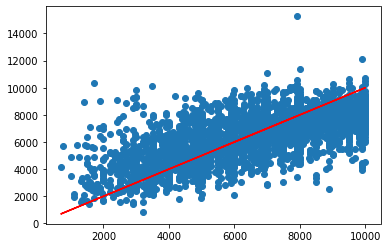

In [39]:
model = model_treining(df_10k)
tf.keras.models.save_model(model,  "Models/model_10k.hdf5")

In [48]:
df_10k["Vehicle_brand"].unique()

array(['Opel', 'Audi', 'BMW', 'Volkswagen', 'Škoda', 'Ford', 'Renault',
       'Mercedes-Benz', 'Toyota', 'Seat', 'Nissan', 'Kia', 'Hyundai',
       'Peugeot', 'Mazda', 'Honda', 'Citroën', 'Fiat', 'Volvo', 'Dacia',
       'Suzuki', 'Mitsubishi', 'Jeep', 'MINI', 'Saab', 'Alfa Romeo',
       'Chevrolet', 'Subaru', 'Jaguar', 'Lexus', 'Chrysler', 'Smart',
       'Land Rover'], dtype=object)

In [40]:
df_25k = df[(df["Price"] > 10000) & (df["Price"] < 25000)]

In [54]:
df_25k["Vehicle_brand"].unique()

array(['Opel', 'Audi', 'BMW', 'Volkswagen', 'Škoda', 'Ford', 'Renault',
       'Mercedes-Benz', 'Toyota', 'Seat', 'Nissan', 'Kia', 'Hyundai',
       'Peugeot', 'Mazda', 'Honda', 'Citroën', 'Fiat', 'Volvo', 'Dacia',
       'Suzuki', 'Mitsubishi', 'Abarth', 'Jeep', 'MINI', 'Saab',
       'Alfa Romeo', 'Chevrolet', 'Subaru', 'Porsche', 'Jaguar', 'Lexus',
       'Chrysler', 'Smart', 'Land Rover'], dtype=object)

Epoch 1/100
159/159 [==============================] - 1s 4ms/step - loss: 7731.9243 - val_loss: 2534.5278
Epoch 2/100
159/159 [==============================] - 1s 3ms/step - loss: 2364.8350 - val_loss: 2264.5364
Epoch 3/100
159/159 [==============================] - 1s 3ms/step - loss: 2236.9634 - val_loss: 2228.0378
Epoch 4/100
159/159 [==============================] - 1s 3ms/step - loss: 2193.9568 - val_loss: 2232.7061
Epoch 5/100
159/159 [==============================] - 1s 3ms/step - loss: 2174.8721 - val_loss: 2247.6780
Epoch 6/100
159/159 [==============================] - 1s 3ms/step - loss: 2156.6646 - val_loss: 2178.2581
Epoch 7/100
159/159 [==============================] - 1s 3ms/step - loss: 2144.9043 - val_loss: 2241.9922
Epoch 8/100
159/159 [==============================] - 1s 3ms/step - loss: 2125.3176 - val_loss: 2148.0393
Epoch 9/100
159/159 [==============================] - 1s 3ms/step - loss: 2108.2795 - val_loss: 2181.4639
Epoch 10/100
159/159 [===============

Epoch 77/100
159/159 [==============================] - 1s 3ms/step - loss: 1718.1896 - val_loss: 1967.3344
Epoch 78/100
159/159 [==============================] - 1s 3ms/step - loss: 1722.6033 - val_loss: 1960.1100
Epoch 79/100
159/159 [==============================] - 1s 3ms/step - loss: 1706.5150 - val_loss: 1965.2106
Epoch 80/100
159/159 [==============================] - 1s 3ms/step - loss: 1708.5303 - val_loss: 1989.8666
Epoch 81/100
159/159 [==============================] - 1s 3ms/step - loss: 1708.9707 - val_loss: 1964.4761
Epoch 82/100
159/159 [==============================] - 1s 3ms/step - loss: 1707.8129 - val_loss: 1976.0905
Epoch 83/100
159/159 [==============================] - 1s 3ms/step - loss: 1698.2588 - val_loss: 1987.0835
Epoch 84/100
159/159 [==============================] - 1s 3ms/step - loss: 1694.3706 - val_loss: 1967.0212
Epoch 85/100
159/159 [==============================] - 1s 3ms/step - loss: 1693.5029 - val_loss: 1987.8457
Epoch 86/100
159/159 [======

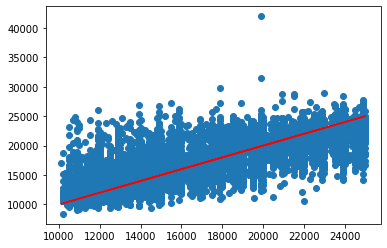

In [41]:
model = model_treining(df_25k)
tf.keras.models.save_model(model,  "Models/model_25k.hdf5")

In [42]:
df_50k = df[(df["Price"] > 25000) & (df["Price"] < 50000)]


In [50]:
df_50k["Vehicle_brand"].unique()

array(['Opel', 'Audi', 'BMW', 'Volkswagen', 'Škoda', 'Ford', 'Renault',
       'Mercedes-Benz', 'Toyota', 'Seat', 'Nissan', 'Kia', 'Hyundai',
       'Peugeot', 'Mazda', 'Honda', 'Citroën', 'Fiat', 'Volvo', 'Dacia',
       'Suzuki', 'Abarth', 'Mitsubishi', 'Jeep', 'MINI', 'Saab',
       'Alfa Romeo', 'Chevrolet', 'Subaru', 'Porsche', 'Jaguar', 'Lexus',
       'Chrysler', 'Smart', 'Land Rover', 'Dodge'], dtype=object)

Epoch 1/100
146/146 [==============================] - 1s 4ms/step - loss: 15900.1963 - val_loss: 4585.6440
Epoch 2/100
146/146 [==============================] - 0s 3ms/step - loss: 4175.6445 - val_loss: 3953.4087
Epoch 3/100
146/146 [==============================] - 0s 3ms/step - loss: 3800.5112 - val_loss: 3889.3696
Epoch 4/100
146/146 [==============================] - 0s 3ms/step - loss: 3670.5598 - val_loss: 3722.9653
Epoch 5/100
146/146 [==============================] - 0s 3ms/step - loss: 3613.4080 - val_loss: 3697.3318
Epoch 6/100
146/146 [==============================] - 0s 3ms/step - loss: 3564.0110 - val_loss: 3697.2085
Epoch 7/100
146/146 [==============================] - 0s 3ms/step - loss: 3523.8916 - val_loss: 3662.6707
Epoch 8/100
146/146 [==============================] - 0s 3ms/step - loss: 3504.8992 - val_loss: 3685.7256
Epoch 9/100
146/146 [==============================] - 0s 3ms/step - loss: 3459.7012 - val_loss: 3621.8523
Epoch 10/100
146/146 [==============

Epoch 77/100
146/146 [==============================] - 1s 4ms/step - loss: 2864.3667 - val_loss: 3279.1460
Epoch 78/100
146/146 [==============================] - 1s 4ms/step - loss: 2873.4551 - val_loss: 3266.0947
Epoch 79/100
146/146 [==============================] - 1s 3ms/step - loss: 2864.4417 - val_loss: 3271.4297
Epoch 80/100
146/146 [==============================] - 1s 3ms/step - loss: 2834.0120 - val_loss: 3296.5859
Epoch 81/100
146/146 [==============================] - 1s 4ms/step - loss: 2833.4307 - val_loss: 3267.2339
Epoch 82/100
146/146 [==============================] - 1s 4ms/step - loss: 2828.6729 - val_loss: 3275.0640
Epoch 83/100
146/146 [==============================] - 1s 3ms/step - loss: 2835.0344 - val_loss: 3284.5269
Epoch 84/100
146/146 [==============================] - 1s 3ms/step - loss: 2827.8059 - val_loss: 3274.8289
Epoch 85/100
146/146 [==============================] - 1s 4ms/step - loss: 2811.1509 - val_loss: 3271.0557
Epoch 86/100
146/146 [======

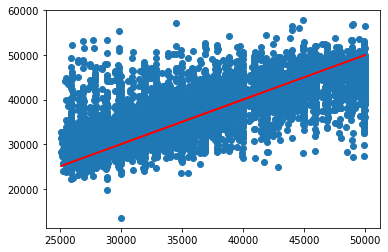

In [43]:
model = model_treining(df_50k)
tf.keras.models.save_model(model,  "Models/model_50k.hdf5")

In [44]:
df_100k = df[(df["Price"] > 50000) & (df["Price"] < 100000)]

In [51]:
df_100k["Vehicle_brand"].unique()

array(['Opel', 'Audi', 'BMW', 'Volkswagen', 'Škoda', 'Ford', 'Renault',
       'Mercedes-Benz', 'Toyota', 'Seat', 'Nissan', 'Kia', 'Hyundai',
       'Peugeot', 'Mazda', 'Honda', 'Citroën', 'Fiat', 'Volvo', 'Dacia',
       'Suzuki', 'Abarth', 'Mitsubishi', 'Jeep', 'MINI', 'Saab',
       'Chevrolet', 'Subaru', 'Alfa Romeo', 'Porsche', 'Jaguar', 'Lexus',
       'Chrysler', 'Smart', 'Land Rover', 'Dodge'], dtype=object)

Epoch 1/100
125/125 [==============================] - 1s 5ms/step - loss: 40154.1484 - val_loss: 9149.6768
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 7993.3413 - val_loss: 7506.7363
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 7113.1304 - val_loss: 7098.3784
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 6784.9883 - val_loss: 7079.1489
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 6662.5874 - val_loss: 6744.0166
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 6526.2432 - val_loss: 6790.8828
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 6443.0122 - val_loss: 6615.8359
Epoch 8/100
125/125 [==============================] - 0s 3ms/step - loss: 6369.7954 - val_loss: 6717.3613
Epoch 9/100
125/125 [==============================] - 0s 3ms/step - loss: 6323.8403 - val_loss: 6525.1396
Epoch 10/100
125/125 [==============

Epoch 77/100
125/125 [==============================] - 0s 3ms/step - loss: 5269.6377 - val_loss: 6189.6870
Epoch 78/100
125/125 [==============================] - 0s 3ms/step - loss: 5218.1611 - val_loss: 5993.6152
Epoch 79/100
125/125 [==============================] - 0s 3ms/step - loss: 5236.4492 - val_loss: 5979.8130
Epoch 80/100
125/125 [==============================] - 0s 3ms/step - loss: 5214.3486 - val_loss: 6159.6284
Epoch 81/100
125/125 [==============================] - 0s 3ms/step - loss: 5199.4238 - val_loss: 6217.5449
Epoch 82/100
125/125 [==============================] - 0s 3ms/step - loss: 5289.5190 - val_loss: 5994.6997
Epoch 83/100
125/125 [==============================] - 0s 3ms/step - loss: 5170.1836 - val_loss: 6120.1045
Epoch 84/100
125/125 [==============================] - 0s 3ms/step - loss: 5207.1890 - val_loss: 6211.9360
Epoch 85/100
125/125 [==============================] - 0s 3ms/step - loss: 5154.1904 - val_loss: 6037.1748
Epoch 86/100
125/125 [======

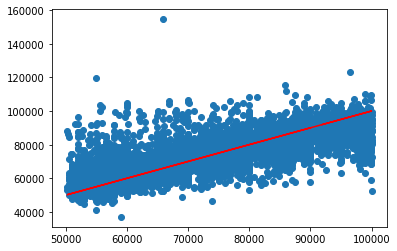

In [45]:
model = model_treining(df_100k)
tf.keras.models.save_model(model,  "Models/model_100k.hdf5")

Epoch 1/100
64/64 [==============================] - 1s 5ms/step - loss: 139381.7812 - val_loss: 129090.5312
Epoch 2/100
64/64 [==============================] - 0s 3ms/step - loss: 42898.8242 - val_loss: 17654.0938
Epoch 3/100
64/64 [==============================] - 0s 3ms/step - loss: 16212.5283 - val_loss: 15561.8633
Epoch 4/100
64/64 [==============================] - 0s 4ms/step - loss: 14926.7344 - val_loss: 14773.9756
Epoch 5/100
64/64 [==============================] - 0s 4ms/step - loss: 14300.8379 - val_loss: 14251.6084
Epoch 6/100
64/64 [==============================] - 0s 3ms/step - loss: 13810.7480 - val_loss: 14403.6211
Epoch 7/100
64/64 [==============================] - 0s 3ms/step - loss: 13513.4658 - val_loss: 13665.9990
Epoch 8/100
64/64 [==============================] - 0s 3ms/step - loss: 13277.9131 - val_loss: 13405.8740
Epoch 9/100
64/64 [==============================] - 0s 3ms/step - loss: 12884.1699 - val_loss: 13246.4316
Epoch 10/100
64/64 [===============

Epoch 77/100
64/64 [==============================] - 0s 3ms/step - loss: 10106.6475 - val_loss: 11819.7197
Epoch 78/100
64/64 [==============================] - 0s 3ms/step - loss: 10070.3223 - val_loss: 11887.6836
Epoch 79/100
64/64 [==============================] - 0s 3ms/step - loss: 10119.9111 - val_loss: 11880.8350
Epoch 80/100
64/64 [==============================] - 0s 3ms/step - loss: 10113.7305 - val_loss: 11820.6006
Epoch 81/100
64/64 [==============================] - 0s 3ms/step - loss: 10091.1855 - val_loss: 11918.5449
Epoch 82/100
64/64 [==============================] - 0s 3ms/step - loss: 10047.3623 - val_loss: 11779.5820
Epoch 83/100
64/64 [==============================] - 0s 3ms/step - loss: 9987.0264 - val_loss: 11854.9648
Epoch 84/100
64/64 [==============================] - 0s 3ms/step - loss: 10009.3418 - val_loss: 11869.2354
Epoch 85/100
64/64 [==============================] - 0s 3ms/step - loss: 9982.1084 - val_loss: 11852.0850
Epoch 86/100
64/64 [==========

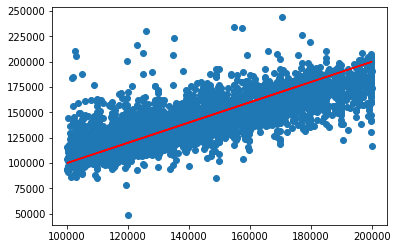

In [46]:
df_200k = df[(df["Price"] > 100000) & (df["Price"] < 200000)]
model = model_treining(df_200k)
tf.keras.models.save_model(model,  "Models/model_50k.hdf5")

In [52]:
df_200k["Vehicle_brand"].unique()

array(['Opel', 'Audi', 'BMW', 'Volkswagen', 'Škoda', 'Ford', 'Renault',
       'Mercedes-Benz', 'Seat', 'Cupra', 'Toyota', 'Nissan', 'Kia',
       'Hyundai', 'Peugeot', 'Mazda', 'Honda', 'Citroën', 'Volvo',
       'Mitsubishi', 'Jeep', 'Suzuki', 'MINI', 'Subaru', 'Alfa Romeo',
       'Porsche', 'Jaguar', 'Lexus', 'Fiat', 'Chevrolet', 'Land Rover',
       'Chrysler', 'Dodge'], dtype=object)

In [74]:
df["Vehicle_brand"].unique()

array(['Opel', 'Audi', 'BMW', 'Volkswagen', 'Škoda', 'Ford', 'Renault',
       'Mercedes-Benz', 'Toyota', 'Seat', 'Cupra', 'Nissan', 'Kia',
       'Hyundai', 'Peugeot', 'Mazda', 'Honda', 'Citroën', 'Fiat', 'Volvo',
       'Dacia', 'Suzuki', 'Abarth', 'Mitsubishi', 'Jeep', 'MINI', 'Saab',
       'Alfa Romeo', 'Chevrolet', 'Subaru', 'Porsche', 'Jaguar', 'Lexus',
       'Chrysler', 'Smart', 'Land Rover', 'Dodge'], dtype=object)

In [103]:
df[df["Vehicle_brand"] == "Dodge"]["Vehicle_model"].unique()

array(['Challenger'], dtype=object)

In [104]:
df.head()

,Price,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Doors_number,Colour,Features
Index,,,,,,,,,,,,,,
116465,42900,Used,Opel,Astra,2015,125000.0,136.0,1598.0,Diesel,Front wheels,Manual,5.0,red,48.0
116466,11900,Used,Opel,Astra,2006,192547.0,140.0,1796.0,Gasoline,Front wheels,Manual,5.0,green,35.0
116467,25900,Used,Opel,Astra,2010,119000.0,115.0,1598.0,Gasoline,Front wheels,Manual,5.0,black,32.0
116468,8400,Used,Opel,Astra,2007,290000.0,100.0,1910.0,Diesel,Front wheels,Manual,5.0,silver,25.0
116469,15999,Used,Opel,Astra,2008,168779.0,115.0,1598.0,Gasoline,Front wheels,Manual,5.0,silver,24.0


In [113]:
df["Colour"].unique()

array(['red', 'green', 'black', 'silver', 'blue', 'gray', 'white',
       'burgundy', 'other', 'beige', 'brown', 'golden', 'yellow',
       'violet'], dtype=object)

In [112]:
df[df["Colour"] == 9]

,Price,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Doors_number,Colour,Features
Index,,,,,,,,,,,,,,
185270,41000,Used,Volkswagen,Caravelle,2006,172000.0,116.0,1998.0,Gasoline,Front wheels,Manual,9.0,silver,16.0


In [115]:
df["Features"].mean()

30.635138595608815

In [117]:
X_test

,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number,Features,Condition_Used,Vehicle_brand_Alfa Romeo,Vehicle_brand_Audi,Vehicle_brand_BMW,...,Colour_burgundy,Colour_golden,Colour_gray,Colour_green,Colour_other,Colour_red,Colour_silver,Colour_violet,Colour_white,Colour_yellow
Index,,,,,,,,,,,,,,,,,,,,,
128672,2004,230000.0,100.0,1600.0,5.0,20.408763,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
154316,1999,171600.0,154.0,1985.0,3.0,20.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176655,2011,193000.0,126.0,1998.0,5.0,29.000000,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
110117,2016,83000.0,71.0,999.0,5.0,17.000000,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
173200,2021,20.0,129.0,1373.0,5.0,29.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171179,2007,213500.0,107.0,1586.0,5.0,24.000000,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
188515,2014,180580.0,122.0,1395.0,5.0,44.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53447,2014,154698.0,115.0,1560.0,5.0,42.000000,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
